# 2.2.6 Limitations of summary statistics

In [61]:
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

color = ["#031B88", "#FB7B8E", "#AAB6FB", "#8A2BE2"]
sns.set_palette(color)

from sklearn.linear_model import LinearRegression

In [57]:
def lin_reg(X: np.ndarray, y: np.ndarray) -> Union[LinearRegression, np.ndarray]:
    X = X.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)
    
    return model, model.predict(X)

def mean(X: np.ndarray):
    return np.round(np.sum(X)/len(X), 2)

def std(X: np.ndarray):
    return np.round(mean(X**2) - mean(X)**2, 2)

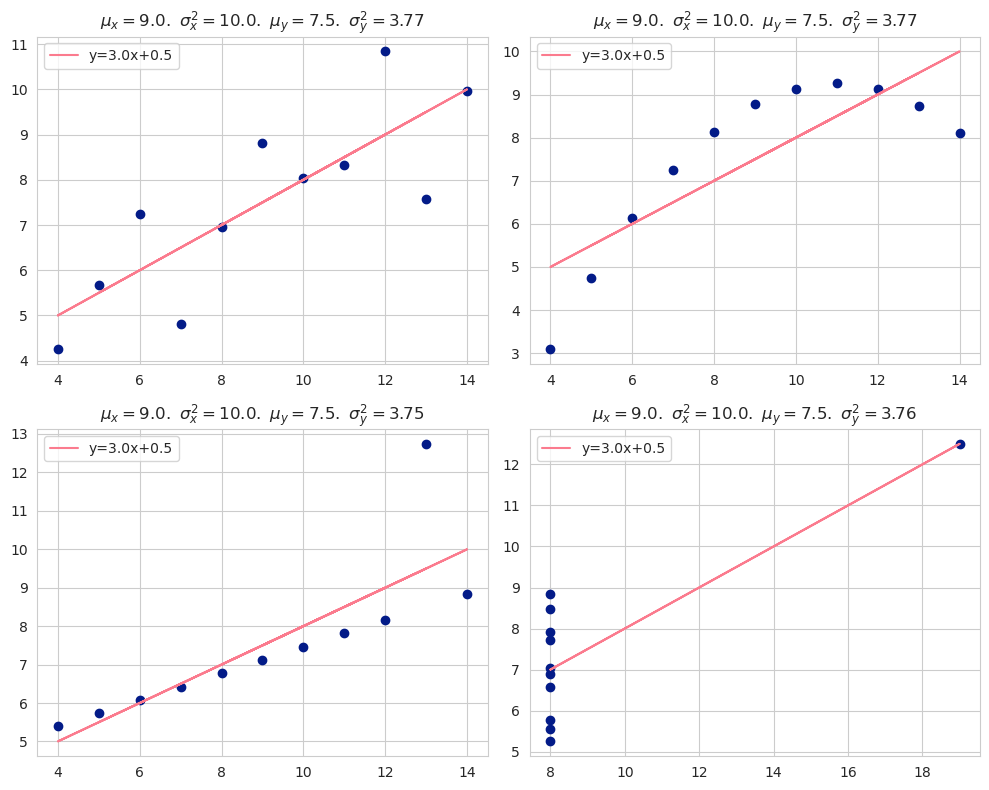

In [59]:
datasets = [
    ([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]),
    ([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]),
    ([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]),
    ([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8], [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])
]
datasets = np.array(datasets)


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, (x, y) in enumerate(datasets):    
    row = i // 2
    col = i % 2
    axs[row, col].scatter(x, y)
    axs[row, col].set_title(f'$\mu_x={mean(x)}.\\ \sigma_x^2={std(x)}. \\ \mu_y={mean(y)}. \\ \sigma_y^2={std(y)}$')

    model, y_pred = lin_reg(x, y)
    label = "y={}x+{}".format(
        np.round(model.intercept_, 2), 
        np.round(model.coef_[0], 2)
    )
    axs[row, col].plot(x, y_pred, color=color[1], label=label)
    axs[row, col].legend()


plt.tight_layout()
plt.show()


In [65]:
df = pd.read_csv('datasaurus.csv')

In [66]:
df

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


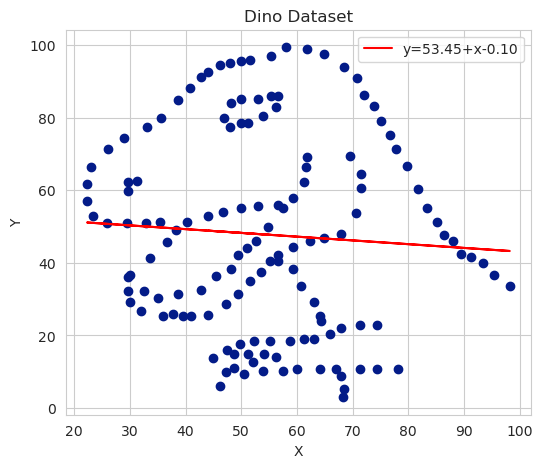

In [103]:
dino_df = df[df['dataset'] == 'dino']

plt.figure(figsize=(6, 5))
# Create a scatter plot for the "dino" dataset
plt.scatter(dino_df['x'], dino_df['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dino Dataset')

# Perform linear regression
model = LinearRegression().fit(dino_df['x'].values.reshape(-1, 1), dino_df['y'])
y_pred = model.predict(dino_df['x'].values.reshape(-1, 1))
label = f"y={model.intercept_:.2f}+x{model.coef_[0]:.2f}"
plt.plot(dino_df['x'], y_pred, color='red', label=label)
plt.legend()

plt.show()

Dataset: away, 
	mean(x)=54.27, std(x)=16.71, mean(y)=47.83, std(y)=26.84
Dataset: bullseye, 
	mean(x)=54.27, std(x)=16.71, mean(y)=47.83, std(y)=26.84
Dataset: circle, 
	mean(x)=54.27, std(x)=16.70, mean(y)=47.84, std(y)=26.84
Dataset: dots, 
	mean(x)=54.26, std(x)=16.71, mean(y)=47.84, std(y)=26.84
Dataset: h_lines, 
	mean(x)=54.26, std(x)=16.71, mean(y)=47.83, std(y)=26.84
Dataset: high_lines, 
	mean(x)=54.27, std(x)=16.71, mean(y)=47.84, std(y)=26.84
Dataset: slant_down, 
	mean(x)=54.27, std(x)=16.71, mean(y)=47.84, std(y)=26.84
Dataset: slant_up, 
	mean(x)=54.27, std(x)=16.71, mean(y)=47.83, std(y)=26.84
Dataset: star, 
	mean(x)=54.27, std(x)=16.71, mean(y)=47.84, std(y)=26.84
Dataset: v_lines, 
	mean(x)=54.27, std(x)=16.71, mean(y)=47.84, std(y)=26.84
Dataset: wide_lines, 
	mean(x)=54.27, std(x)=16.71, mean(y)=47.83, std(y)=26.84
Dataset: x_shape, 
	mean(x)=54.26, std(x)=16.71, mean(y)=47.84, std(y)=26.84


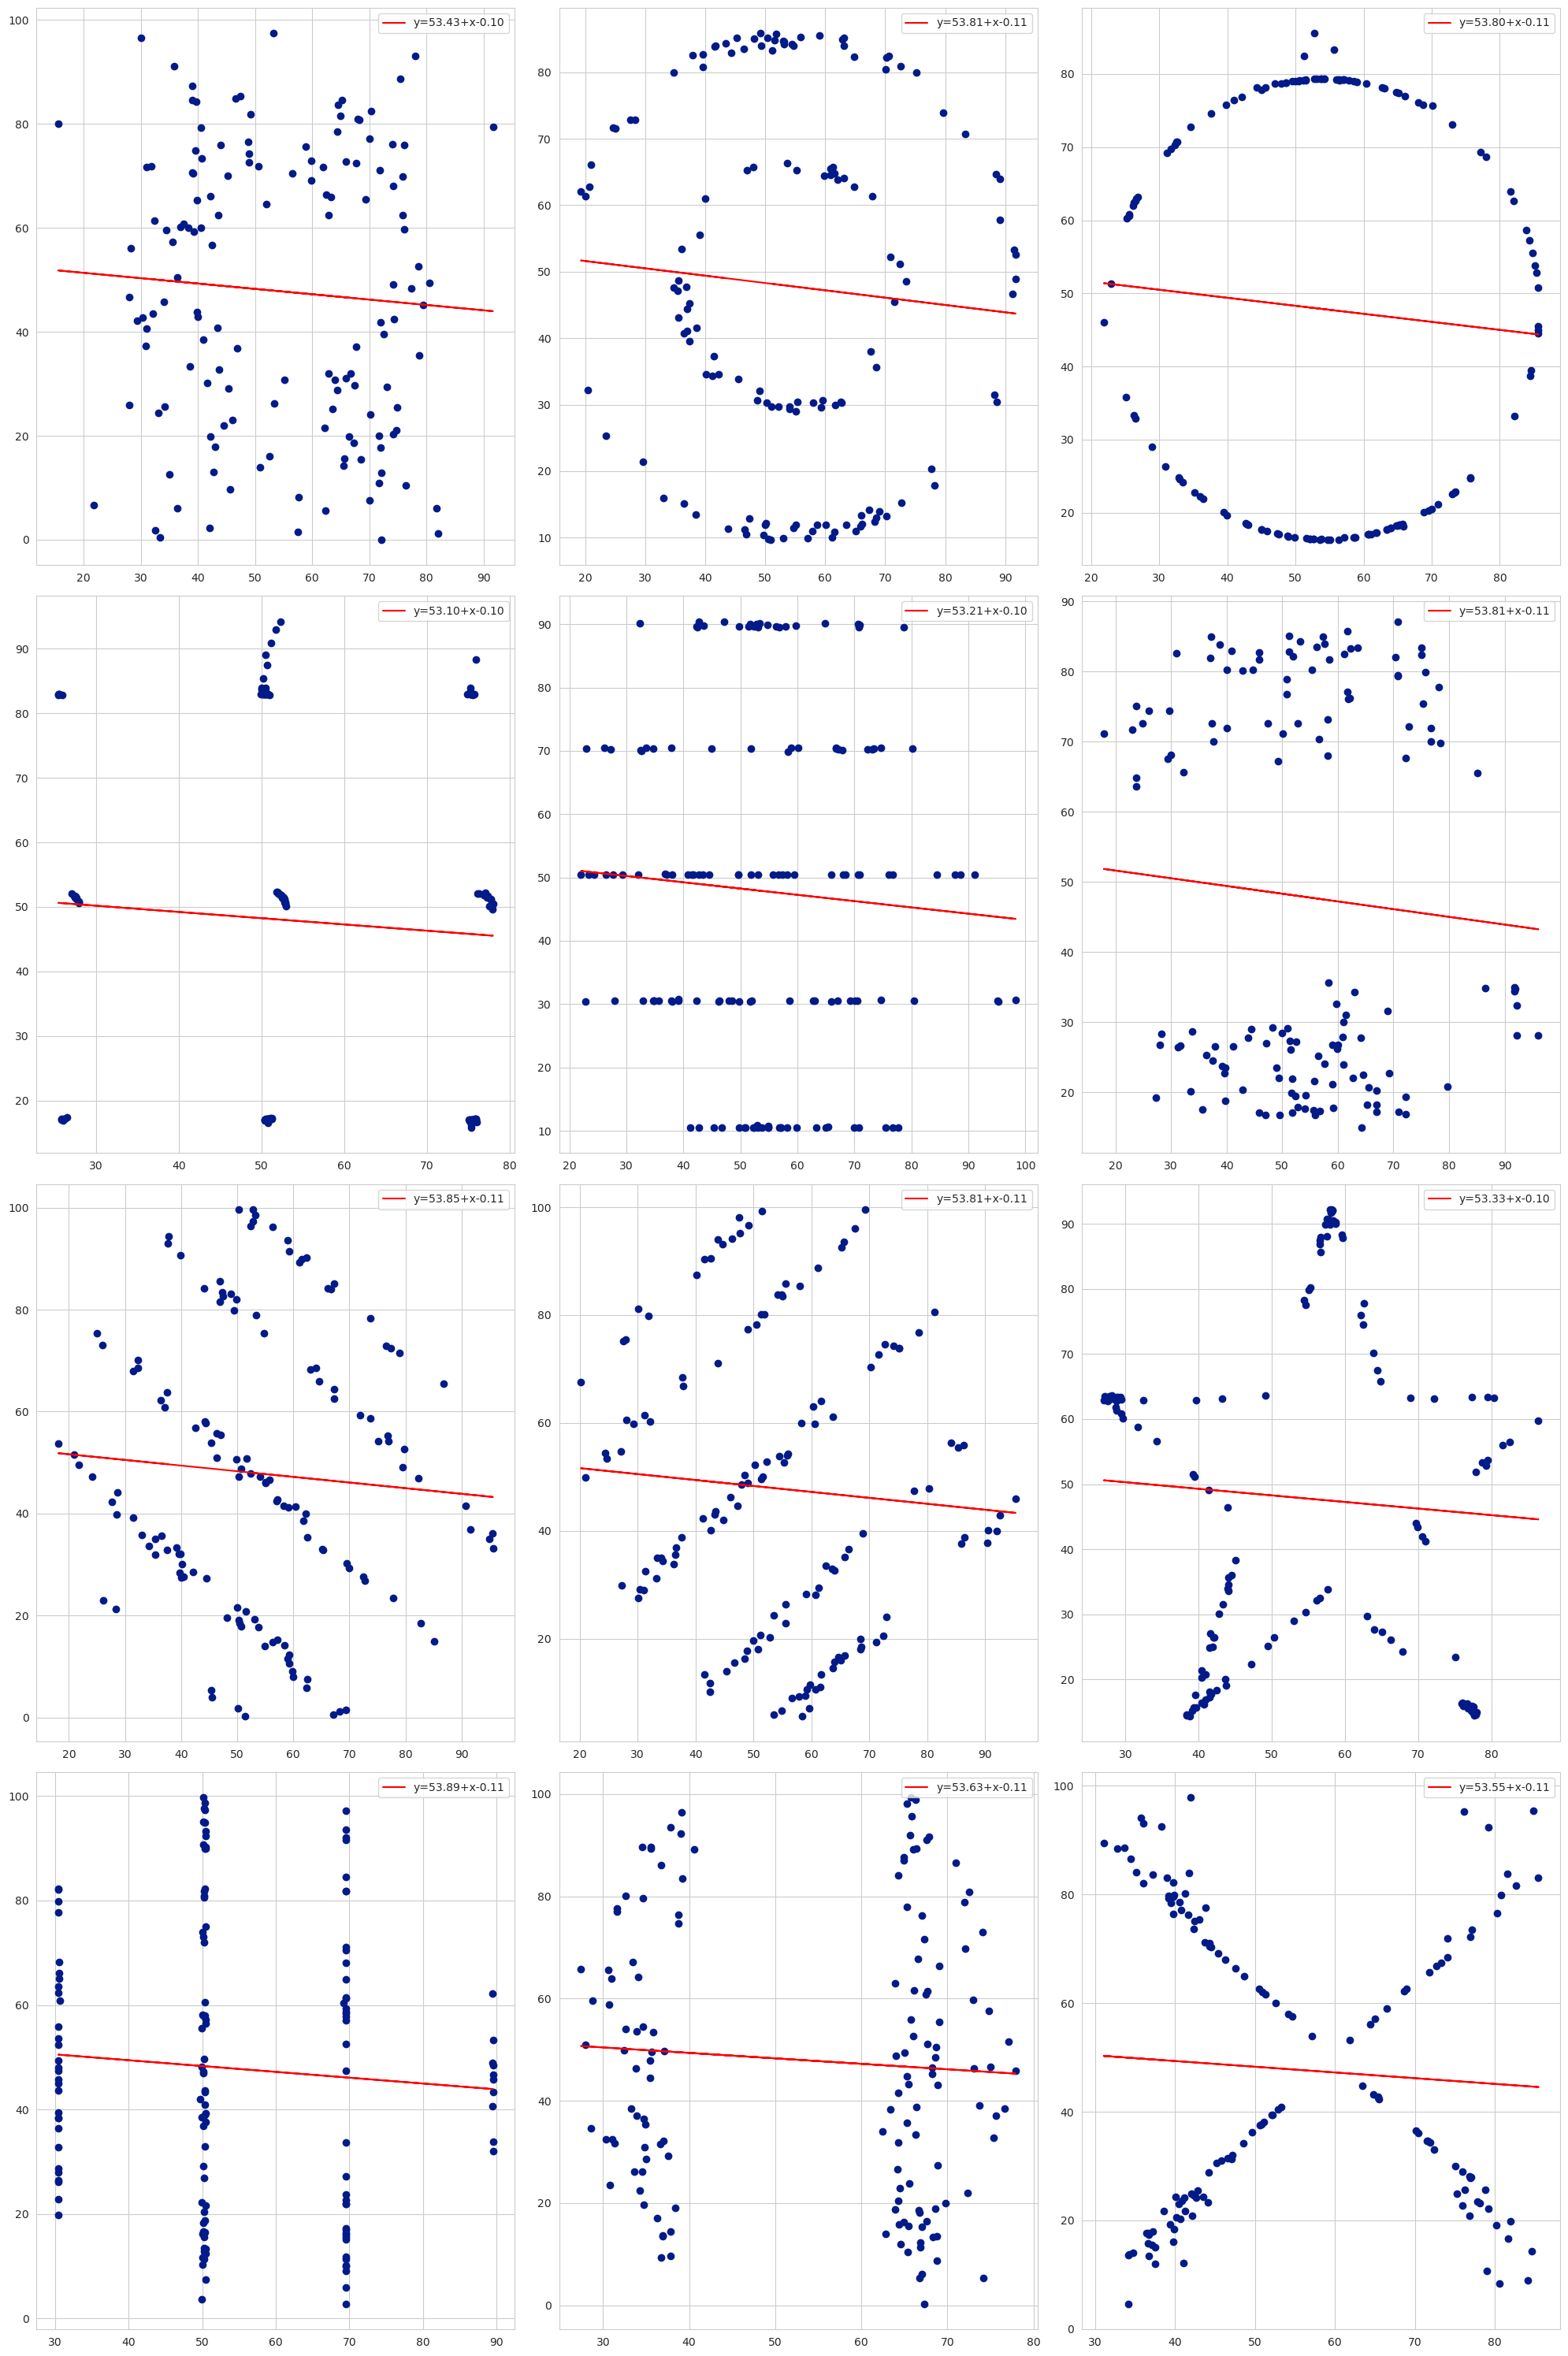

In [93]:
grouped = df.groupby('dataset')

# Create a figure with subplots
fig, axs = plt.subplots(4, 3, figsize=(20, 30))

# Iterate over each dataset
i = 0
for name, group in grouped:
    if name == "dino":
        continue
    
    row = i // 3 
    col = i % 3
    i += 1

    x = group['x']
    y = group['y']
    axs[row, col].scatter(x, y)

    print(f'Dataset: {name}, \n\tmean(x)={np.mean(x):.2f}, std(x)={np.std(x):.2f}, mean(y)={np.mean(y):.2f}, std(y)={np.std(y):.2f}')

    # Perform linear regression
    model = LinearRegression().fit(x.values.reshape(-1, 1), y)
    y_pred = model.predict(x.values.reshape(-1, 1))
    label = f"y={model.intercept_:.2f}+x{model.coef_[0]:.2f}"

    axs[row, col].plot(x, y_pred, color='red', label=label)
    axs[row, col].legend()

plt.tight_layout()
plt.show()
